# Packages

In [29]:
import pandas as pd
import numpy as np
import random
import glob
import os 

from scipy.signal import stft
import matplotlib.pyplot as plt



# Load Sample Data

In [33]:
### LOAD Data Description
dataset_path = "../dataset"
dirs = os.listdir(dataset_path)


for dir in dirs:
    if dir in ['dataframe']:
        continue

    file_paths = sorted(glob.glob(f'{dataset_path}/{dir}/' + '*.dat'))
    print(f'Processing: {dir}...')
    
    data = dict(
        location = [], 
        person_id = [],
        activity = [], 
        reps = [],
        complex_cnt = [] # Complex value output from Radar data
    )

    for dat in file_paths:
        try:
            label = data['label'] = dat.split('/')[-1].split('.')[0]
            data['location'].append(dir)
            data['person_id'].append(label[2:4])
            data['activity'].append(label[4:7])
            data['reps'].append(label[7:])

            with open(dat, 'r') as f:
                lines = f.readlines()

                data['complex_cnt'].append(len(lines[4:]))

        except Exception as e:
            print(dat, e)
            continue

raw_df = pd.DataFrame(data)

Processing: 6February2019NGHomesDataset...
Processing: 5February2019UoGDataset...
Processing: 7March2019WestCumbriaDataset...
Processing: 3June2017Dataset...
Processing: 4July2018Dataset...
Processing: 1December2017Dataset...
Processing: 2March2017Dataset...


In [35]:
raw_df

,location,person_id,activity,reps,complex_cnt,label
0,2March2017Dataset,03,A01,R1,1280000,6P12A06R2
1,2March2017Dataset,03,A01,R2,1280000,6P12A06R2
2,2March2017Dataset,10,A01,R1,1280000,6P12A06R2
3,2March2017Dataset,10,A01,R2,1280000,6P12A06R2
4,2March2017Dataset,11,A01,R1,1280000,6P12A06R2
5,2March2017Dataset,11,A01,R2,1280000,6P12A06R2
6,2March2017Dataset,12,A01,R1,1280000,6P12A06R2
7,2March2017Dataset,12,A01,R2,1280000,6P12A06R2
8,2March2017Dataset,03,A02,R1,640000,6P12A06R2
9,2March2017Dataset,03,A02,R2,640000,6P12A06R2


In [22]:
def load_sample():
    random.seed(11)
    dataset_path = "../dataset/1December2017Dataset"
    file_paths = sorted(glob.glob(f'{dataset_path}/' + '*.dat'))
    dat = random.choice(file_paths)

    data = dict(
        label = None, # .dat file name
        fc = None, # carrier frequency
        duration = None,
        samples = None, # per recorded beat-note signal
        bandwith = None, # Hz
        complexes = None # Complex value output from Radar data
    )
    cols = list(data.keys())

    data['label'] = dat.split('/')[-1].split('.')[0]

    with open(dat, 'r') as f:
        lines = f.readlines()

        for i, line in enumerate(lines, 1):
            if i < 5:
                data[cols[i]] = float(line)
            else:
                data[cols[-1]] = [complex(x.replace('i', 'j')) for x in lines[4:]]
                break
    
    return data

data = load_sample()
data.keys()

dict_keys(['label', 'fc', 'duration', 'samples', 'bandwith', 'complexes'])

In [32]:
print(data['label'])

4P55A04R01


# Convert complex number to Spectogram

/tmp/ipykernel_7864/3479119474.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  freq, times, signal =  stft(np.asarray(data['complexes']), fs=data['duration']/data['samples'], nperseg=32, noverlap=16)


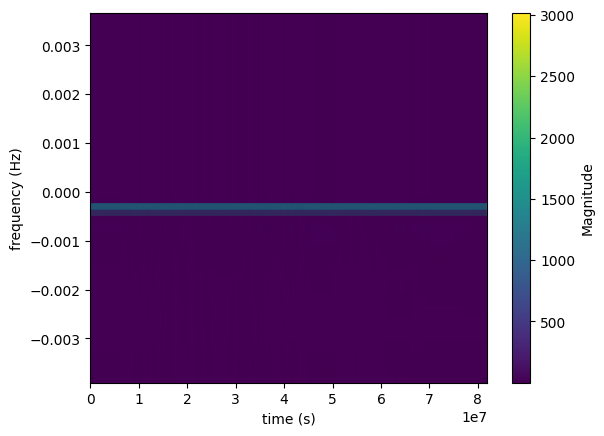

In [31]:
freq, times, signal =  stft(np.asarray(data['complexes']), fs=data['duration']/data['samples'], nperseg=32, noverlap=16)


plt.pcolormesh(times, freq, np.abs(signal), shading='gouraud')
plt.ylabel('frequency (Hz)')
plt.xlabel('time (s)')
# plt.title('Spectogram')
plt.colorbar(label='Magnitude')
plt.show()